

                                    Orbite et Runge Kutta 4



Ce rapport a pour but de mettre en oeuvre des méthodes de résolution numérique en particulier Runge Kutta 4. Nous commencerons par déterminer la trajectoire de la lune dans le champ de gravité de la Terre. En faisant le graphe de la trajectoire , nous nous apercevrons de son allure orbitale , nous calculerons alors son excentricité , sa période , ses demis-axes.
Nous calculerons ensuite l'ordre de convergence de la méthode utilisée et enfin nous introduirons un troisème corps ; un astéroïde. Nous appliquerons à nouveau la méthode de Runge Kutta 4 pour la trajectoire de celui ci. Pour terminer , nous montrerons une petite animation des différentes trajectoire. 



Commençons.
Nous savons que deux objets de masse $m_1$ , $m_2$ subissent une force d'attraction :
$$\overrightarrow{F}_{1,2}=\frac{-Gm_1m_2\overrightarrow{r}}{|\overrightarrow{r}|^3}=\overrightarrow{F}_{2,1}$$
${\vec r}$ est le vecteur qui relie le centre de $m_2$ à celui de $m_1$
Ceci va nous permettre d'écrire nos équations du mouvement.
Le vecteur $\overrightarrow{r}$ sera pour nous la position relative de la lune par rapport à la terre et elle peut s'écrire comme 
$ (x_{lune}-x_{terre})\overrightarrow{u}_x+(y_{lune}-y_{terre})\overrightarrow{u}_y $

Nous pouvons donc projeter la force de gravité sur nos axes.
$$F_x=\frac{-Gm_1m_2x}{(x^2+y^2)^{3/2}}$$
$$F_y=\frac{-Gm_1m_2y}{(x^2+y^2)^{3/2}}$$
ou $G=6.67408.10^{-11}m^3kg^{-1}s^{-2}$ est la constante de gravitation universelle

Continuons , on sait que $\vec{F}=m\vec{a}$ , ou $\vec{a}$ est l'accélération. Elle est par définition égale à la dérivée temporelle seconde de la position , soit $\ddot{\vec r}$.
Ainsi , en projetant à nouveau nous avons : 

$$F_x=ma_x=m\ddot x$$
$$F_y=ma_y=m \ddot y$$

Prenons $x=(x_{lune}-x_{terre})$ et $y=(y_{lune}-y_{terre})$. Nous avons dès lors
$$ \ddot x =\frac{-G(m_T+m_L)x}{(x^2+y^2)^{3/2}}$$
$$\ddot y =\frac{-G(m_T+m_L)y}{(x^2+y^2)^{3/2}}$$

Ou $m_T$ est la masse de la Terre , $5.972.10^{24}kg$ 
et $m_L$ est la masse de la Lune, $7.348.10^{22}kg$

De plus , la vitesse $v$ est donnée par $\dot r$. ( Et fatalement , $v_x=\dot x$ et $v_y=\dot y$ ). Ainsi , 

$$\dot v_x = \frac{-G(m_T+m_L)x}{(x^2+y^2)^{3/2}}$$
$$\dot v_y = \frac{-G(m_T+m_L)y}{(x^2+y^2)^{3/2}}$$

Nous y sommes presque.
On définit le vecteur $u =\begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} $
Ainsi , la dérivée de $u$ serra donnée par $u'=\begin{pmatrix} v_x \\ v_y \\ \dot v_x \\ \dot v_y \end{pmatrix}$ ou de manière plus explicite , $$u'=\begin{pmatrix} v_x \\ v_y \\ \frac{-G(m_T+m_L)x}{(x^2+y^2)^{3/2}} \\ \frac{-G(m_T+m_L)y}{(x^2+y^2)^{3/2}} \end{pmatrix}$$
Le dernier pas qu'il nous faut accomplir est juste de définir $f(\overrightarrow u)=u'$. Voilà , nous avons tout en main désormais pour résoudre de manière numérique ce problème.

Nous commençons par importer ce qu'il nous faut , ainsi que poser les conditions initiales.

In [41]:
import numpy
from matplotlib import pyplot
from matplotlib import rcParams

In [42]:
# Paramètres du modèle:
G = 6.67408*10**-11       #Constante gravitaionnelle, exprimée ici en (m**3)*(kg**-1)*(s**-2)
ml = 7.348*10**22         #Masse de la Lune, en kg
mt = 5.972*10**24         #Masse de la Terre, en kg


# On pose les conditions initiales:
x0 = -362600000.
y0 = 0.
# Les coord. cart. de la posit. initiale choisies arbitrairement, t.q. la distance Terre-Lune à t = 0 soit rmin
vx0 = 0.
vy0 = 1083.434974

# Les vitesse et positions sont exprimées respectivement en m*s**-1 et m.

1) Résolution numérique des équations différentielles

Pour résoudre numériquement nos équations nous allons utiliser la méthode de Runge-Kutta4 donné sur  https://fr.wikipedia.org/wiki/M%C3%A9thodes_de_Runge-Kutta#La_m.C3.A9thode_de_Runge-Kutta_classique_d.27ordre_quatre_.28RK4.29.

la méthode est la suivante. Pour un problème tel que $u'=f(u)$ , avec certaines conditions initiales $u(t=0)=u_0$ et un cetain pas d'ittération dt :
$$u_{n+1}=u_n + \frac{dt}{6}(k_1+2(k_2+k_3)+k_4)$$
Nous définissions $k_1$ , $k_2$ , $k_3$ , $k_4$ comme suit : 
\begin{equation}
k_1=f(u_n) \\
k_2=f(u_n+\frac{dt}{2}k_1) \\
k_3=f(u_n+\frac{dt}{2}k_2) \\
k_4=f(u_n+u_n+dt.k_3)
\end{equation}

Dans la cellule de code ci dessous , nous écrivons notre fonction $f(\overrightarrow u)$

In [43]:
def f(u):
    x = u[0]
    y = u[1]
    vx = u[2]
    vy = u[3]     
    return numpy.array([vx, vy, -G*(mt+ml)*x/((x**2+y**2)**(3/2)), -G*(mt+ml)*y/((x**2+y**2)**(3/2))])
    
 

Nous allons maintenant créer notre fonction Runge-Kutta4

In [44]:
def rk4(u,f,dt):
    
        k1 = f(u)
        k2 = f(u+((dt/2)*k1))
        k3 = f(u+((dt/2)*k2))
        k4 = f(u+(dt*k3))
        u_f = u + ((dt/6)*(k1 + (2*k2) + (2*k3) + k4))
        
        return u_f
    
#L'algorithme pour Runge-Kutta d'ordre 4.


Nous avons notre fonction $f$ , nous avons notre fonction Runge-Kutta4. Il ne nous reste plus qu'à implémenter un algorithme pour trouver une solution.

In [45]:
T = 2462400.     #Longueur de notre grille de temps (en s),
                 #choisie t.q. T > Période de révolution de la Lune autour de la Terre (~ 27 jours)
dt = 1           #Incrément de temps
N = int(T/dt) + 1     #Nombre de points tn dans la grille de temps T, tels que tn et tn+1 sont espacés de dt.
u = numpy.array([x0,y0,vx0,vy0])
x = numpy.zeros(N)
y = numpy.zeros(N)
vx = numpy.zeros(N)
vy = numpy.zeros(N)

for n in range(0,N):
    u = rk4(u,f,dt)
    x[n] = u[0]
    y[n] = u[1]
    vx[n] = u[2]
    vy[n] = u[3]
    
# Il s'agit d'une boucle appliquant N+1 fois RK4 sur la variable locale u,
# qui est un 4-vecteur contenant les 2 coordonnées de position et les 2 coordonnées de vitesse de la Lune.
# A la nième itération de RK4, chaque composante de u est gardée en mémoire dans la nième composante
# d'un N+1-vecteur x, y, vx ou vy. En particulier, on obtient donc à la fin
# les N+1 coordonées de positions x et y pour toute la trajectoire, contenues dans les vecteurs x et y resp.

Notre boucle applique $ N+1$ fois RK4 sur la variable locale $u$. $u$ est un vecteur qui contient les 2 coordonnées de positions et  vitesses relatives Terre-Lune. Nous lui  Nous créons des vecteurs $x$ , $y$ , $v_x$ et $v_y$ pôur qu'a la ième itération les composantes de $u$ soient chaque fois stockée à la ième place dans les vecteurs  $x$ , $y$ , $v_x$ et $v_y$. Nous aurons donc à la fin des matrices $x$ et $y$ qui contiennent les positions espacées chaque fois d'un temps $dt$

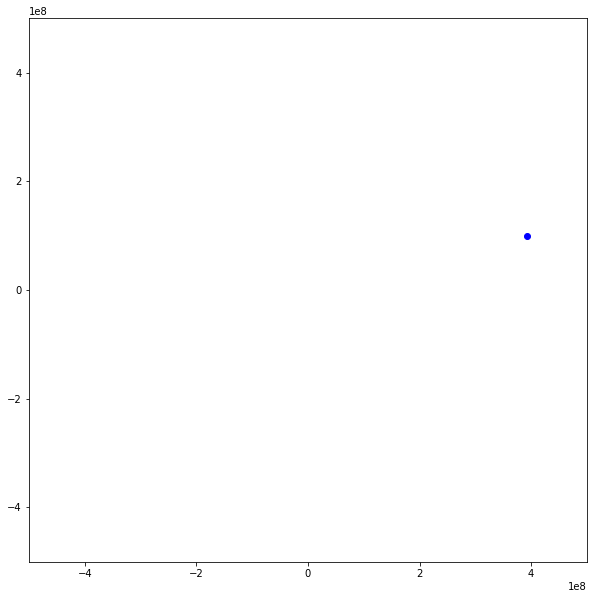

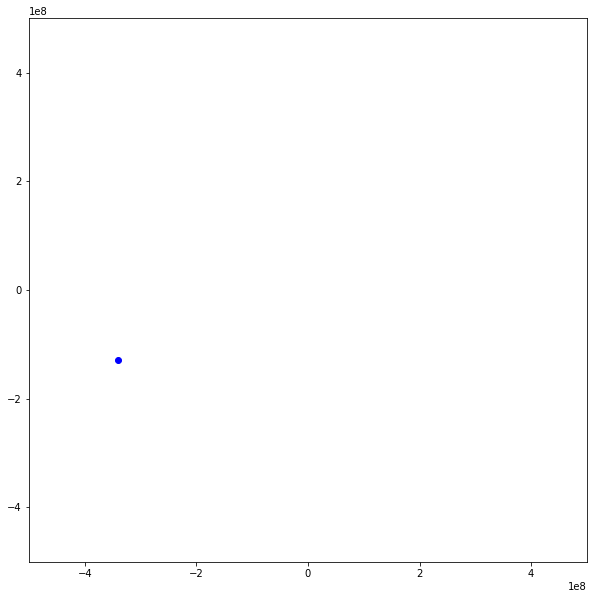

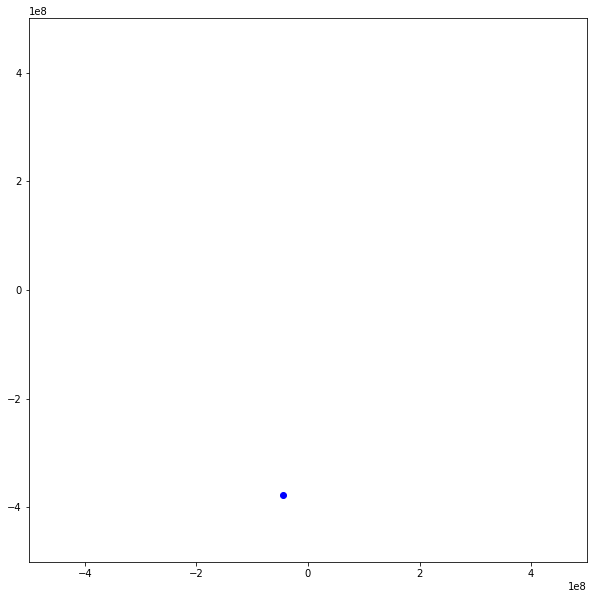

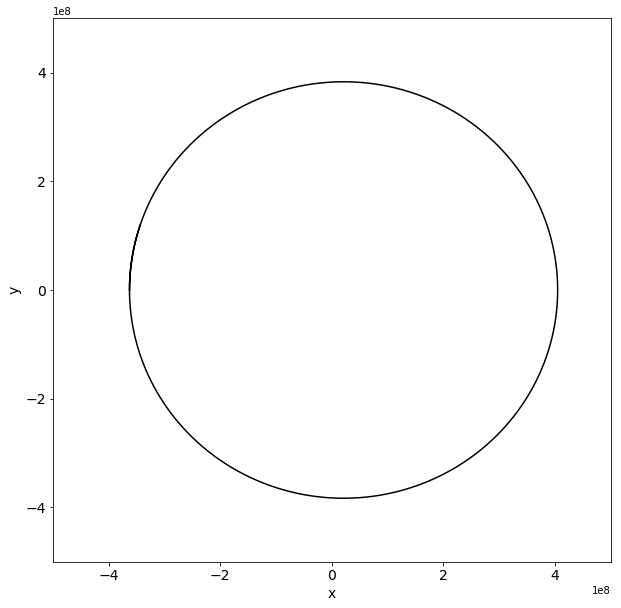

In [46]:
pyplot.figure(figsize=(10,10))     #On définit la taille du 'plot'
pyplot.xlim(-500000000,500000000)
pyplot.ylim(-500000000,500000000)
pyplot.tick_params(axis='both', labelsize=14)
pyplot.xlabel('x', fontsize=14)
pyplot.ylabel('y', fontsize=14)
pyplot.plot(x,y, 'k-');
pyplot.show()

#Les limites des axes x et y sont choisies telles que
# tous les points puissent être représentés sur la figure.

Nous obtenons, comme nous nous y attendions, une trajectoire elliptique. Celle-ci ressemble à un
cercle, ce qui peut nous rassurer compte tenu de la valeur fournie pour l’excentricité. En effet, celle-
ci vaut 0.0549000295618 et est donc très proche de 0, la valeur de l’excentricité du cercle. Nous aurons l'occasion de le revérifier un peu plus bas

Nous calclulons ci dessous , la matrice des rayons pour tout nos temps. Elle nous sera utile plus tard.

In [48]:
ra=numpy.zeros(N)

def r(x,y):
    return (x**2+y**2)**0.5

#Fonction qui à chaque point du plan OXY associe la distancede celui-ci à l'origine.

for n in range(0,N):
    ra[n]=r(x[n],y[n])

#Nous formons un N+1-vecteur ra, contenant la distance à l'origine de tous les points de la trajectoire.

In [49]:
import statistics 
from statistics import mean

In [50]:
rmin = 362600000.

In [51]:
#Question 2


Nous calculerons l’excentricité de l’ellipse formée par la trajectoire, en nous servant des valeurs des
demi-petit axe et demi-grand axe. Pour commencer, nous devons donc calculer ceux-ci. Remarquons
que, le système d’axes étant choisi tel que le segment reliant l’origine au périgée de l’orbite est
aligné sur l’axe OX, les demi-axes doivent être alignés sur les axes du repère. Il suffit donc de calculer,
parmi tous les points de la trajectoire, l’écart maximal entre les coordonnées x de deux points, de
répéter l’opération pour les coordonnées y, puis de comparer les deux valeurs obtenues. La plus
grande sera la valeur du demi-grand axe, tandis que la plus petite sera la valeur du demi-petit axe.
Par ce raisonnement nous obtenons que le demi-grand axe est aligné sur l’axe OX.

In [52]:
#Demi-petit axe:

b = (max(y)-min(y))/2

#Demi-grand axe:
 
a = (max(x)-min(x))/2

Une fois calculées les valeurs des demi-axes de l’ellipse, le calcul de l’excentricité est direct, et se fait
en utilisant la formule (formule wiki) : 
$$e=\sqrt{1-\frac{b^2}{a^2}}$$

https://fr.wikipedia.org/wiki/Ellipse_(math%C3%A9matiques)

Les valeurs obtenues sont très proches des valeurs mesurées, trouvées dans le lien ci-dessous:
https://www.le-systeme-solaire.net/lune.html
La valeur obtenue est proche de la valeur moyenne mesurée ~ 0,0549, trouvée sur le lien suivant:
https://fr.wikipedia.org/wiki/Orbite_de_la_Lune

In [53]:
#Second calcul pour la valeur de l'excentricité:

e = numpy.sqrt(1 - (b**2/a**2))
print(e)

0.0549000295618


In [54]:


#Question 3




La période de révolution lunaire est données par la formulation newtonienne de la troisième Loi de
kepler, qui est (formule wikki) : 
$$\tau=\sqrt{\frac{4a^3\pi^2}{G(m_T+m_L)}}$$
https://fr.wikipedia.org/wiki/Lois_de_Kepler
À nouveau la valeur calculée numériquement est proche de la valeur expérimentale, qui est de
27.3220 (jours) x 86400 (s/jours) = 2 360 620.8 s , voir le lien ci-dessous :
https://www.le-systeme- solaire.net/lune.html

In [100]:
#Période orbitale:

from math import sqrt
from math import pi

Tau=sqrt((4*a**3*pi**2)/(G*(mt+ml)))    #Période de révolution obtenue en s.
print(Tau)

2350681.801961972


In [56]:



#Question 4




In [57]:
from math import ceil
from math import fabs
from numpy import shape

Nous voulons ici calculer l'ordre de convergence de la méthode. 
Nous allons donc comparer des solutions avec des pas différents. Fatalement ces solutions auront des matrices de taille différente. Mais cela n'est pas un problème , nous pouvons effectuer un ratio en faisant un quotient du nombre d'élements dans chaque matrice-solution pour pouvoir les comparer. 

In [58]:
def get_diffgrid(u1,u2,dt): 
    
    N_modele=len(u1[:,0])
    N_obtenu=len(u2[:,0])
    ration=ceil(N_modele/N_obtenu)     # Plus petit entier supérieur au ratio du nombre de points formant
                                       # la trajectoire idéale et du nombre de points formant 
                                       # une trajectoire de résolution inférieure.
    
    ua=u1[1]
    ub=u2[1]
    uc=ua[::ration]                    # On crée un nouveau vecteur contenant la seconde composante de
                                       # chaque ligne de u1 dont l'indice est un multiple entier du ratio.
                                       # Ceci permet de pouvoir travailler avec 2 vecteurs
                                       # de tailles identiques.
    
    diff=dt*abs(numpy.sum(ub-uc))
    return diff


In [104]:
from math import log
r=2
dt1=10

dt1_valeur=numpy.array([dt1,dt1*r,dt1*r**2])

diffgrid2 = numpy.empty(2)

u_valeur = numpy.empty_like(dt1_valeur,dtype=numpy.ndarray)

for i, t in enumerate(dt1_valeur):
    
    N = int(T/t) + 1  
    u = numpy.zeros((N, 4))
    u[0] = numpy.array([x0,y0,vx0,vy0])
    
    for n in range(0,N-1):

        u[n+1] = rk4(u[n],f,t)     
    
    u_valeur[i] = u
        

        
diffgrid2[0] = get_diffgrid(u_valeur[1], u_valeur[0], dt1_valeur[1])
        
diffgrid2[1] = get_diffgrid(u_valeur[2], u_valeur[1], dt1_valeur[2])
        
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)
print(p)

2.000061287096825


Nous pouvons observer que pour des grands dt l'odre est celui attendu , c'est à dire 4 . Mais au plus le dt choisi est petit , au plus nos valeurs fluctuent.




#Question 5

Enoncé : "Au moment du passage de la lune à l'appogée de sa trajectoire, un astéroïde traverse le centre de l'ellipse avec une vitesse $(v_x,v_y)=(-500{\rm m/s},500 {\rm m/s})$ (mesurée toujours par rapport à la terre). Modifier votre code numérique pour calculer la position de cet astéroïde après 14 jours. On suppose que l'astéroïde est dévié par le systeme Terre-Lune mais que celui-ci est trop léger pour modifier la trajectoire de la terre ou de la lune."



Le système d’équations change un peu, car nous avons maintenant affaire à deux corps qui tournent
dans le champ de gravité terrestre. Le système d’équations différentielles change donc aussi,
puisqu’il faut y ajouter celles qui régissent le comportement des coordonnées de position et de
vitesse de l’astéroïde.

Nous réitérons le même procédé que pour la trajectoire de la lune. Cependant , notre vecteur $u$ aura ici 8 composantes, 4 pour celles de l'astéroïde et 4 pour celles de la lune qui évolueront parallèlement. 
L'astéroîde subit deux attractions : celle de la Lune et celle de la Terre. Nous écrivons cela comme suit :
$$\dot v_{x_{ast}} = \frac{-Gm_Tx_{ast}}{(x_{ast}^2+y_{ast}^2)^{3/2}} -\frac{-Gm_lx_{ast}}{((x_{ast}-x_l)^2+(y_{ast}-y_l)^2)^{3/2}}$$
$$\dot v_{y_{ast}} = \frac{-Gm_Ty_{ast}}{(x_{ast}^2+y_{ast}^2)^{3/2}}-\frac{-Gm_ly_{ast}}{((x_{ast}-x_l)^2+(y_{ast}-y_l)^2)^{3/2}}$$

Notre vecteur $\overrightarrow u $  est donc donné par $$\overrightarrow u=\begin{pmatrix} x_{ast} \\ y_{ast} \\ v_{x_ast} \\ v_{y_ast} \\ x_{lune} \\ y_{lune} \\ v_{xlune} \\ v_{ylune} \end{pmatrix} $$
et $$ \overrightarrow u' = f(\overrightarrow u) = \begin{pmatrix} v_{xast} \\ v_{yast} \\ \dot v_{xast} \\ \dot {v_{y_{ast}}} \\ v_{xlune} \\ v_{ylune} \\ \dot v_{xlune} \\ \dot v_{ylune} \end{pmatrix}$$

In [81]:
def g(u):
    x=u[0]
    y=u[1]
    vx=u[2]
    vy=u[3]
    xl=u[4]
    yl=u[5]
    vlx=u[6]
    vly=u[7]
    return numpy.array([vx,vy,-G*mt*x/(x**2+y**2)**1.5-G*ml*(x-xl)/((x-xl)**2+(y-yl)**2)**1.5  , -G*mt*y/(x**2+y**2)**1.5-G*ml*(y-yl)/((x-xl)**2+(y-yl)**2)**1.5 , vlx, vly, -G*(mt+ml)*xl/((xl**2+yl**2)**(3/2)), -G*(mt+ml)*yl/((xl**2+yl**2)**(3/2))])

# u est un 8-vecteur qui contient 2 couples de coordonnées de position
# et deux couples de coordonnées de vitesse. Il correspond au membre de gauche
# de notre second système d'EDO. f(u) est le 8-vecteur dérivé,
# qui contient donc les expressions des vitesses et d'accélérations de la Lune et de l'astéroïde.

Ici, les conditions initiales de la Lune changent, car à l’instant (t0 = 0) l’astéroïde arrive en (0,0)
 avec la vitesse (-500,500) et au même instant la Lune est à l’apogée de sa trajectoire. Les conditions initiales
pour le nouveau problème de Cauchy sont donc les coordonnées de position et de vitesse de la Lune,
telles que si $(x(t0),y(t0))$ sont les coordonnées de position, $r(t0) = \sqrt{(x(t_0)^2 + y(t_0)^2)} = max(r(t)) $ 
On calcule donc ces coordonnées en considérant l’indice M du maximum pour le vecteur des
distances Terre-Lune, puis en itérant M+1 fois la fonction rk4 sur les conditions initiales du problème
précédent. Le vecteur que nous obtenons est le vecteur position – vitesse correspondant à l’apogée
de la trajectoire obtenue au 1 er problème. Remarquons que la nouvelle trajectoire sera la même que
la précédente, puisque les conditions dynamiques de la Lune ne sont pas modifiée (on considère que
l’astéroïde est de masse suffisamment petite pour ne pas influencer le mouvement de la Lune). Seule
la chronologie des vecteurs position-vitesse peut changer.

In [82]:
M = numpy.argmax(ra)     #Indice de l'apogée de la Lune.

In [83]:
#Conditions initiales de la Question 1:
xl0 = -362600000.
yl0 = 0.
vlx0 = 0.
vly0 = 1083.434974

#Calcul des nouvelles conditions initiales de la Lune:
v = numpy.array([xl0,yl0,vlx0,vly0])
for n in range(0,M):
    v = rk4(v,f,1)

print(v)

#v contient les coordonnées de position et de vitesse de la Lune lorsqu'elle est à son apogée.

[  4.04726233e+08   8.74550497e+02   2.21929533e-03  -9.70664834e+02]


In [84]:
#Conditions intiales de la Lune:

xl0 = v[0]
yl0 = v[1]
vlx0 = v[2]
vly0 = v[3]
u_lune = numpy.array([xl0,yl0,vlx0,vly0])

#Conditions initiales de l'astéroïde:
xa0=a-362600000
ya0=0
vax0=-500.
vay0=500.
u_astre= numpy.array([xa0,ya0,vax0,vay0,xl0,yl0,vlx0,vly0])

dt = 1
N = int(T/dt) + 1

#Création de N-vecteurs vides qui contiendront les points des trajectoires de la Lune et de l'astéroïde:
xl = numpy.zeros(N)
yl = numpy.zeros(N)
xa = numpy.zeros(N)
ya = numpy.zeros(N)

for n in range(0,N):
    u_astre = rk4(u_astre, g, dt)
    xa[n] = u_astre[0]
    ya[n] = u_astre[1]

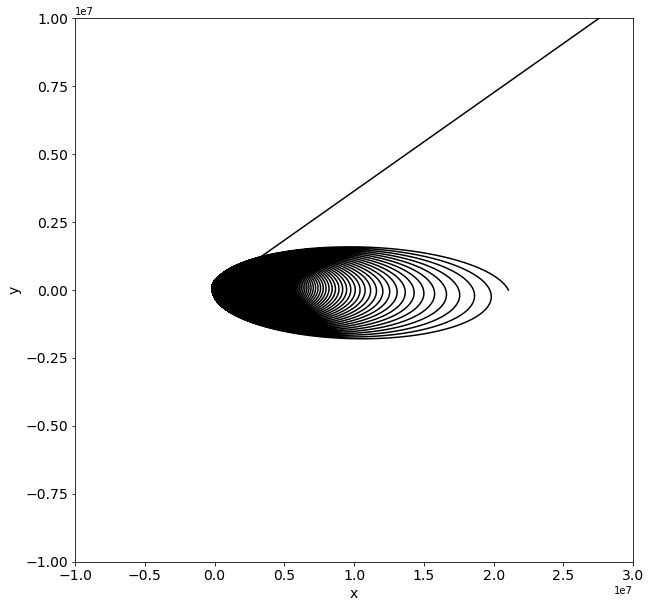

In [99]:
pyplot.figure(figsize=(10,10))
pyplot.xlim(-10000000,30000000)
pyplot.ylim(-10000000,10000000)
pyplot.tick_params(axis='both', labelsize=14)
pyplot.xlabel('x', fontsize=14)
pyplot.ylabel('y', fontsize=14)
pyplot.plot(xa,ya, 'k-');
pyplot.show()

Après avoir effectué le plot de la trajectoire pour l’astéroïde, nous remarquons d’abord que
l’astéroïde suit un régime elliptique d’excentricité variable. En regardant la forme de cette ellipse,
nous en déduisons que les valeurs de l’excentricité doivent s’étendre sur un intervalle de valeurs plus
grandes que pour l’ellipse de la Lune, car cette dernière était plus « circulaire » que ne le sont les
nouvelles courbes. Nous voyons ensuite qu’à un instant, l’astéroïde change de régime et suit une
trajectoire hyperbolique. Nous en déduisons que les conditions dynamiques de l’astéroïde à cet
instant sont telles que son excentricité devient supérieure ou égale à 1. L’astéroïde repart alors vers
l’infini, sorti du champ de gravité Terre-Lune.

In [ ]:



#Question 6




In [86]:
from matplotlib import animation
from IPython.display import HTML

Pour faire l’animation, nous construisons, en itérant rk4 un vecteur N2 x 8 contenant les trajectoires
Lune et astéroïde. Nous introduisons la fonction init() utilisée dans le MOOC. Nous construisons
ensuite une fonction trajectoire_asteroïde() qui prend comme argument un indice i prenant une
valeur entre 1 et N2, et qui insère les ièmes coordonnées de position de l’astéroïde dans la ligne de
données ‘line’. Cette fonction est appelée par la fonction func à chaque itération de cette dernière,
les itérations étant séparées par un intervalle de temps (réel) de 10 ms.

In [103]:


dt2 = 20000
N2 = int(T/dt)+1

U = numpy.empty((N2,8))
U[0,:] = numpy.array([xa0,ya0,vax0,vay0,xl0,yl0,vlx0,vly0])

for n in range(N2-1):

    U[n+1,:] = rk4(U[n,:],g,dt2)
    
def init():
    line.set_data([],[])
    return line

In [106]:
fig = pyplot.figure(figsize = (10,10))
ax = pyplot.axes(xlim = (-500000000,500000000), ylim = (-500000000,500000000))
line = ax.plot([],[],'bo--')[0]

In [107]:
#Fonction servant à l'animation de l'astéroïde seulement:
def trajectoire_lune(i):
    line.set_data(U[i][0],U[i][1])
    return line

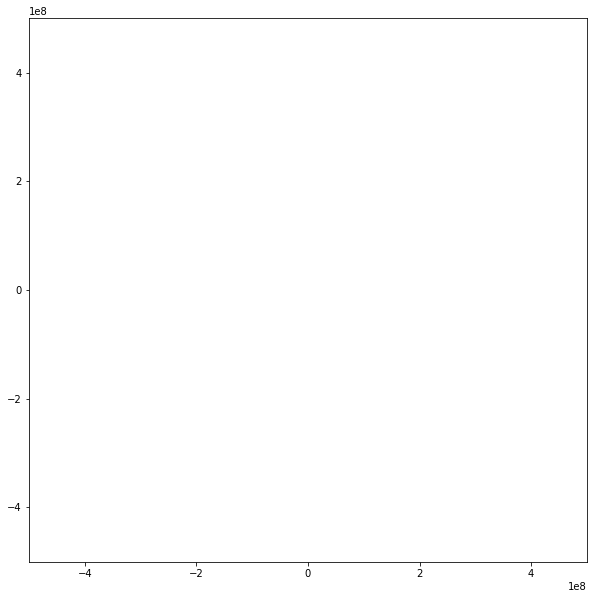

In [108]:
anim = animation.FuncAnimation(fig,trajectoire_astéroïde, init_func = init,frames = N2, interval = 100)
pyplot.show()

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
def init2():
    line2.set_data([],[])
    return line2

In [ ]:
#Fonction servant à l'animation de la Lune seulement:
def trajectoire_Lune(i):
    line2.set_data(U[i,0],U[i,1])
    return line2

In [ ]:
def init3():
    line3.set_data([],[])
    return line3

In [ ]:
#Fonction servant à l'animation del'astéroïde et dela Lune simultanément:
def trajectoire_astres(i):
    line3.set_data([U[i,0],U[i,4]],[U[i,1],U[i,5]])
    return line3